In [21]:
import pandas as pd
import os

In [22]:
df = pd.read_csv('scores/volume_score.csv', index_col=0)
df = df.loc['BRO_ah':]
df

,old,prophet,kpi,start_train,end_train
BRO_ah,54.982456,51.078388,volume,2016-03-10,2020-09-01
PSG_ah,145.333333,127.745971,volume,2017-01-10,2020-09-01
CS-Nat,23.175439,19.521367,volume,2017-01-01,2020-09-01
CS-Ala,13.157895,22.922938,volume,2016-04-30,2020-09-01
RIS_ah,207.561404,198.316753,volume,2017-01-20,2020-09-01
CS-Mar,41.578947,64.457328,volume,2017-01-01,2020-09-01
WISE-C,407.245614,552.770230,volume,2016-01-20,2020-09-01
RCS-PH,37.508772,40.783542,volume,2016-04-30,2020-09-01
CS-Joh,54.087719,59.655489,volume,2017-01-01,2020-09-01


In [23]:
df['diff (hours)'] = (df['old'] - df['prophet'])
diff = df[df['diff (hours)']>0]['diff (hours)']
diff

BRO_ah     3.904068
PSG_ah    17.587362
CS-Nat     3.654072
RIS_ah     9.244650
Name: diff (hours), dtype: float64

In [24]:
hours_saved = diff.sum()

print('Daily aht Saved:',round(hours_saved,1))
print('Annual Savings:',"${:,.2f}".format(hours_saved * 262 * 25))

Daily aht Saved: 34.4
Annual Savings: $225,255.50


# approximately 36 calls per day in savings
accross 262 business days at approximately `$25 per hour = $353,605 per year` in labor allocation cost savings across 'CS-National', 'RIS', 'PSG', 'CS-Maryland', 'CS-John-Hancock', 'WISE-Contractrual'

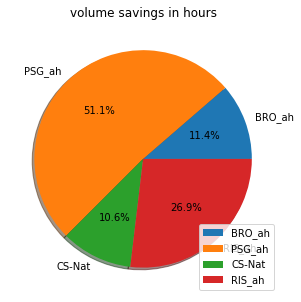

In [25]:
import matplotlib.pyplot as plt

df['diff (hours)'][df['diff (hours)']>0].plot.pie(autopct='%0.1f%%', figsize=(5, 5),
                                          shadow=True)
plt.title('volume savings in hours')
plt.ylabel('')
plt.legend(loc='lower right')
plt.show()